# Logistic Regression From Scratch

In [1]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# import LogisticRegression from logistic_regression.py
from logistic_regression import LogisticRegression
from sklearn.linear_model import LogisticRegression as LogisticRegressionSklearn


## Import dataset


In [2]:
# Load the dataset included with scikit-learn
dataset = load_breast_cancer()
# Put data in a pandas DataFrame
df_dataset = pd.DataFrame(dataset.data, columns=dataset.feature_names)

## Transform data label

In [14]:
# Add target and class to DataFrame
df_dataset["target"] = dataset.target
df_dataset["class"] = dataset.target_names[dataset.target]

# Show 10 random samples
#print(df_dataset.sample(n=10))

#print(df_dataset.shape)

## Load your data into X and y

In [4]:
# same process as always, identify your X's and your y's
X,y = df_dataset.drop(['target','class'],axis=1), df_dataset.target


## Define train test split

In [5]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=0)

# Scale the X's
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)



## Logistics Regression
To find the coefficients C, we use the formular
$$
C = (X{train}^TX{train})^{-1}X{train}^TY{train}
$$
Given X, to predict Y, use
$$
\begin{equation}
Y_{score} = \frac{1}{1+e^{-XC}}
\end{equation}
$$
$$
\begin{equation}
Y{pred} = 0 \ if \ Y{score} \ < \ 0.5 \ else \ 1
\end{equation}
$$


sources:
1. https://www.hackerearth.com/practice/machine-learning/linear-regression/multivariate-linear-regression-1/tutorial/
2. https://realpython.com/logistic-regression-python/

## Fit the model

In [6]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

## Make Predictions on Train and Test Set

In [7]:
yTrain_pred = logistic_regression.predict(X_train)
yTest_pred = logistic_regression.predict(X_test)

## Compute Accuracy

In [8]:
yTrain_score = logistic_regression.score(y_train, yTrain_pred)
yTest_score = logistic_regression.score(y_test, yTest_pred)

print('Train Accuracy {:0.2f}%'.format( yTrain_score ))
print('Test Accuracy {:0.2f}%'.format( yTest_score ))

Train Accuracy 98.02%
Test Accuracy 95.61%


## Confusion Matrix

In [9]:
y_label = dataset.target_names
pd.DataFrame(confusion_matrix(y_test, yTest_pred),\
     columns=['pred_'+str(y_label[i])  for i in y_test.unique()],index=['act_'+str(y_label[i])  for i in y_test.unique()])

,pred_malignant,pred_benign
act_malignant,41,1
act_benign,4,68


## Plot words

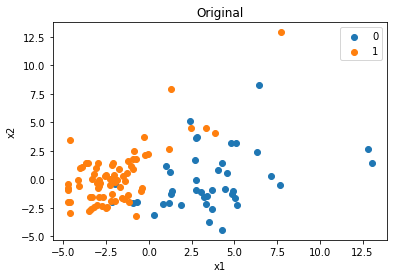

In [10]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

logistic_regression.make_plot(y_test,X_test_pca,'Original')


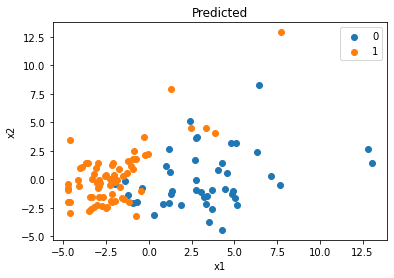

In [11]:
logistic_regression.make_plot(yTest_pred,X_test_pca,'Predicted')

## Sklearn Fitting

               pred_malignant  pred_benign
act_malignant              40            2
act_benign                  0           72

Train Accuracy 98.90%
Test Accuracy 98.25%


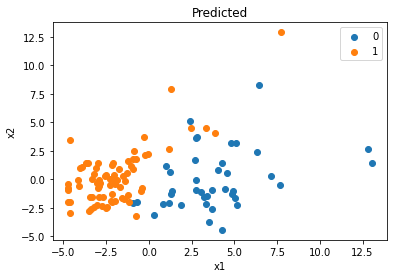

In [12]:
logistic_regression_sklearn = LogisticRegressionSklearn(solver='liblinear')
logistic_regression_sklearn.fit(X_train,y_train)

yTrain_pred_sklearn = logistic_regression_sklearn.predict(X_train)
yTest_pred_sklearn = logistic_regression_sklearn.predict(X_test)

yTrain_score_sklearn = (sum(y_train == yTrain_pred_sklearn) / len(yTrain_pred_sklearn))*100
yTest_score_sklearn = (sum(y_test == yTest_pred_sklearn) / len(yTest_pred_sklearn))*100

#Confussion Matrix
y_label_sklearn = dataset.target_names
cm = pd.DataFrame(confusion_matrix(y_test, yTest_pred_sklearn),\
     columns=['pred_'+str(y_label_sklearn[i]) for i in y_test.unique()],index=['act_'+str(y_label_sklearn[i])  for i in y_test.unique()])

print(cm)
print('\nTrain Accuracy {:0.2f}%'.format( yTrain_score_sklearn ))
print('Test Accuracy {:0.2f}%'.format( yTest_score_sklearn ))

logistic_regression.make_plot(yTest_pred_sklearn,X_test_pca,'Predicted')

## Single value prediction with best model

In [17]:
id=10

y_pred = logistic_regression.predict(X_test[id].reshape(1,-1))
y_pred_sklearn = logistic_regression_sklearn.predict(X_test[id].reshape(1,-1))
y_label = dataset.target_names

print("Actual:\t",y_label[y_test.values[id]])
print("L_Pred:\t",y_label[yTest_pred[0]])
print("Skearn:\t", y_label[y_pred_sklearn[0]])


Actual:	 malignant
L_Pred:	 malignant
Skearn:	 malignant
